In [2]:
import tensorflow as tf
import datetime
import os
import pandas as pd
import numpy as np


def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    import gzip
    labels_path = os.path.join(path,'%s-labels-idx1-ubyte.gz'% kind)
    images_path = os.path.join(path,'%s-images-idx3-ubyte.gz'% kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(labels), 784)

    return images, labels

#load and preprocess data

dataset = 'emnist' # or 'emnist'
output_layers = 10 # default, will be overridden


if dataset == 'mnist':
    output_layers = 10
    mnist = tf.keras.datasets.mnist
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
elif dataset == 'emnist':
    mapp = pd.read_csv("emnist/emnist-letters-mapping.txt", delimiter = ' ', \
                   index_col=0, header=None, squeeze=True)

    
    emnist_distinct_upper = ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'N', 'Q', 'R', 'T'] # Characters with distinct uppercase
    emnist_nondistinct_upper = ['c', 'i', 'j', 'k', 'l', 'm', 'o', 'p', 's', 'u', 'v', 'w', 'x', 'y', 'z'] # Characters with non-distinct uppercase
    emnist_nondistinct_upper_partial = ['c', 'i', 'k', 'l', 'm', 'o', 'p', 's', 'v', 'x', 'z'] # A selection of 11 characters to use as our model can not be too big

                             # always uppercase  # Choose one of ('emnist_distinct_upper', 'emnist_nondistinct_upper_partial')
    emnist_characters = [ord(i.upper()) for i in emnist_distinct_upper]

                                        # COLUMN 1 is uppercase
    emnist_characters_ascii = list(mapp[mapp[1].isin(emnist_characters)].index)

    output_layers = len(emnist_characters_ascii)
    x_train, y_train = load_mnist('emnist', kind='emnist-letters-train') # X stands for features, y for targets
    x_test, y_test = load_mnist('emnist', kind='emnist-letters-test')
    
    train_mask = np.isin(y_train, emnist_characters_ascii)
    x_train = x_train[train_mask]
    y_train = y_train[train_mask] - 1
    test_mask = np.isin(y_test, emnist_characters_ascii)
    x_test = x_test[test_mask]
    y_test = y_test[test_mask] - 1

In [3]:
def rotate(image):
    image = image.reshape(28, 28, 1)
    image = np.fliplr(image)
    image = np.rot90(image)
    return image

In [4]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = np.asarray(x_train)
x_train = np.apply_along_axis(rotate, 1, x_train)
print ("x_train:",x_train.shape)

x_test = np.asarray(x_test)
x_test = np.apply_along_axis(rotate, 1, x_test)
print ("x_test:",x_test.shape)

x_train: (52800, 28, 28, 1)
x_test: (8800, 28, 28, 1)


In [6]:
import matplotlib.pyplot as plt


In [80]:
rows_per_item = 10

In [81]:
plot_items = np.asarray([np.random.choice(np.where(y_train == i)[0], rows_per_item) for i in np.unique(y_train) ])
plot_items_1d = plot_items.T.ravel()

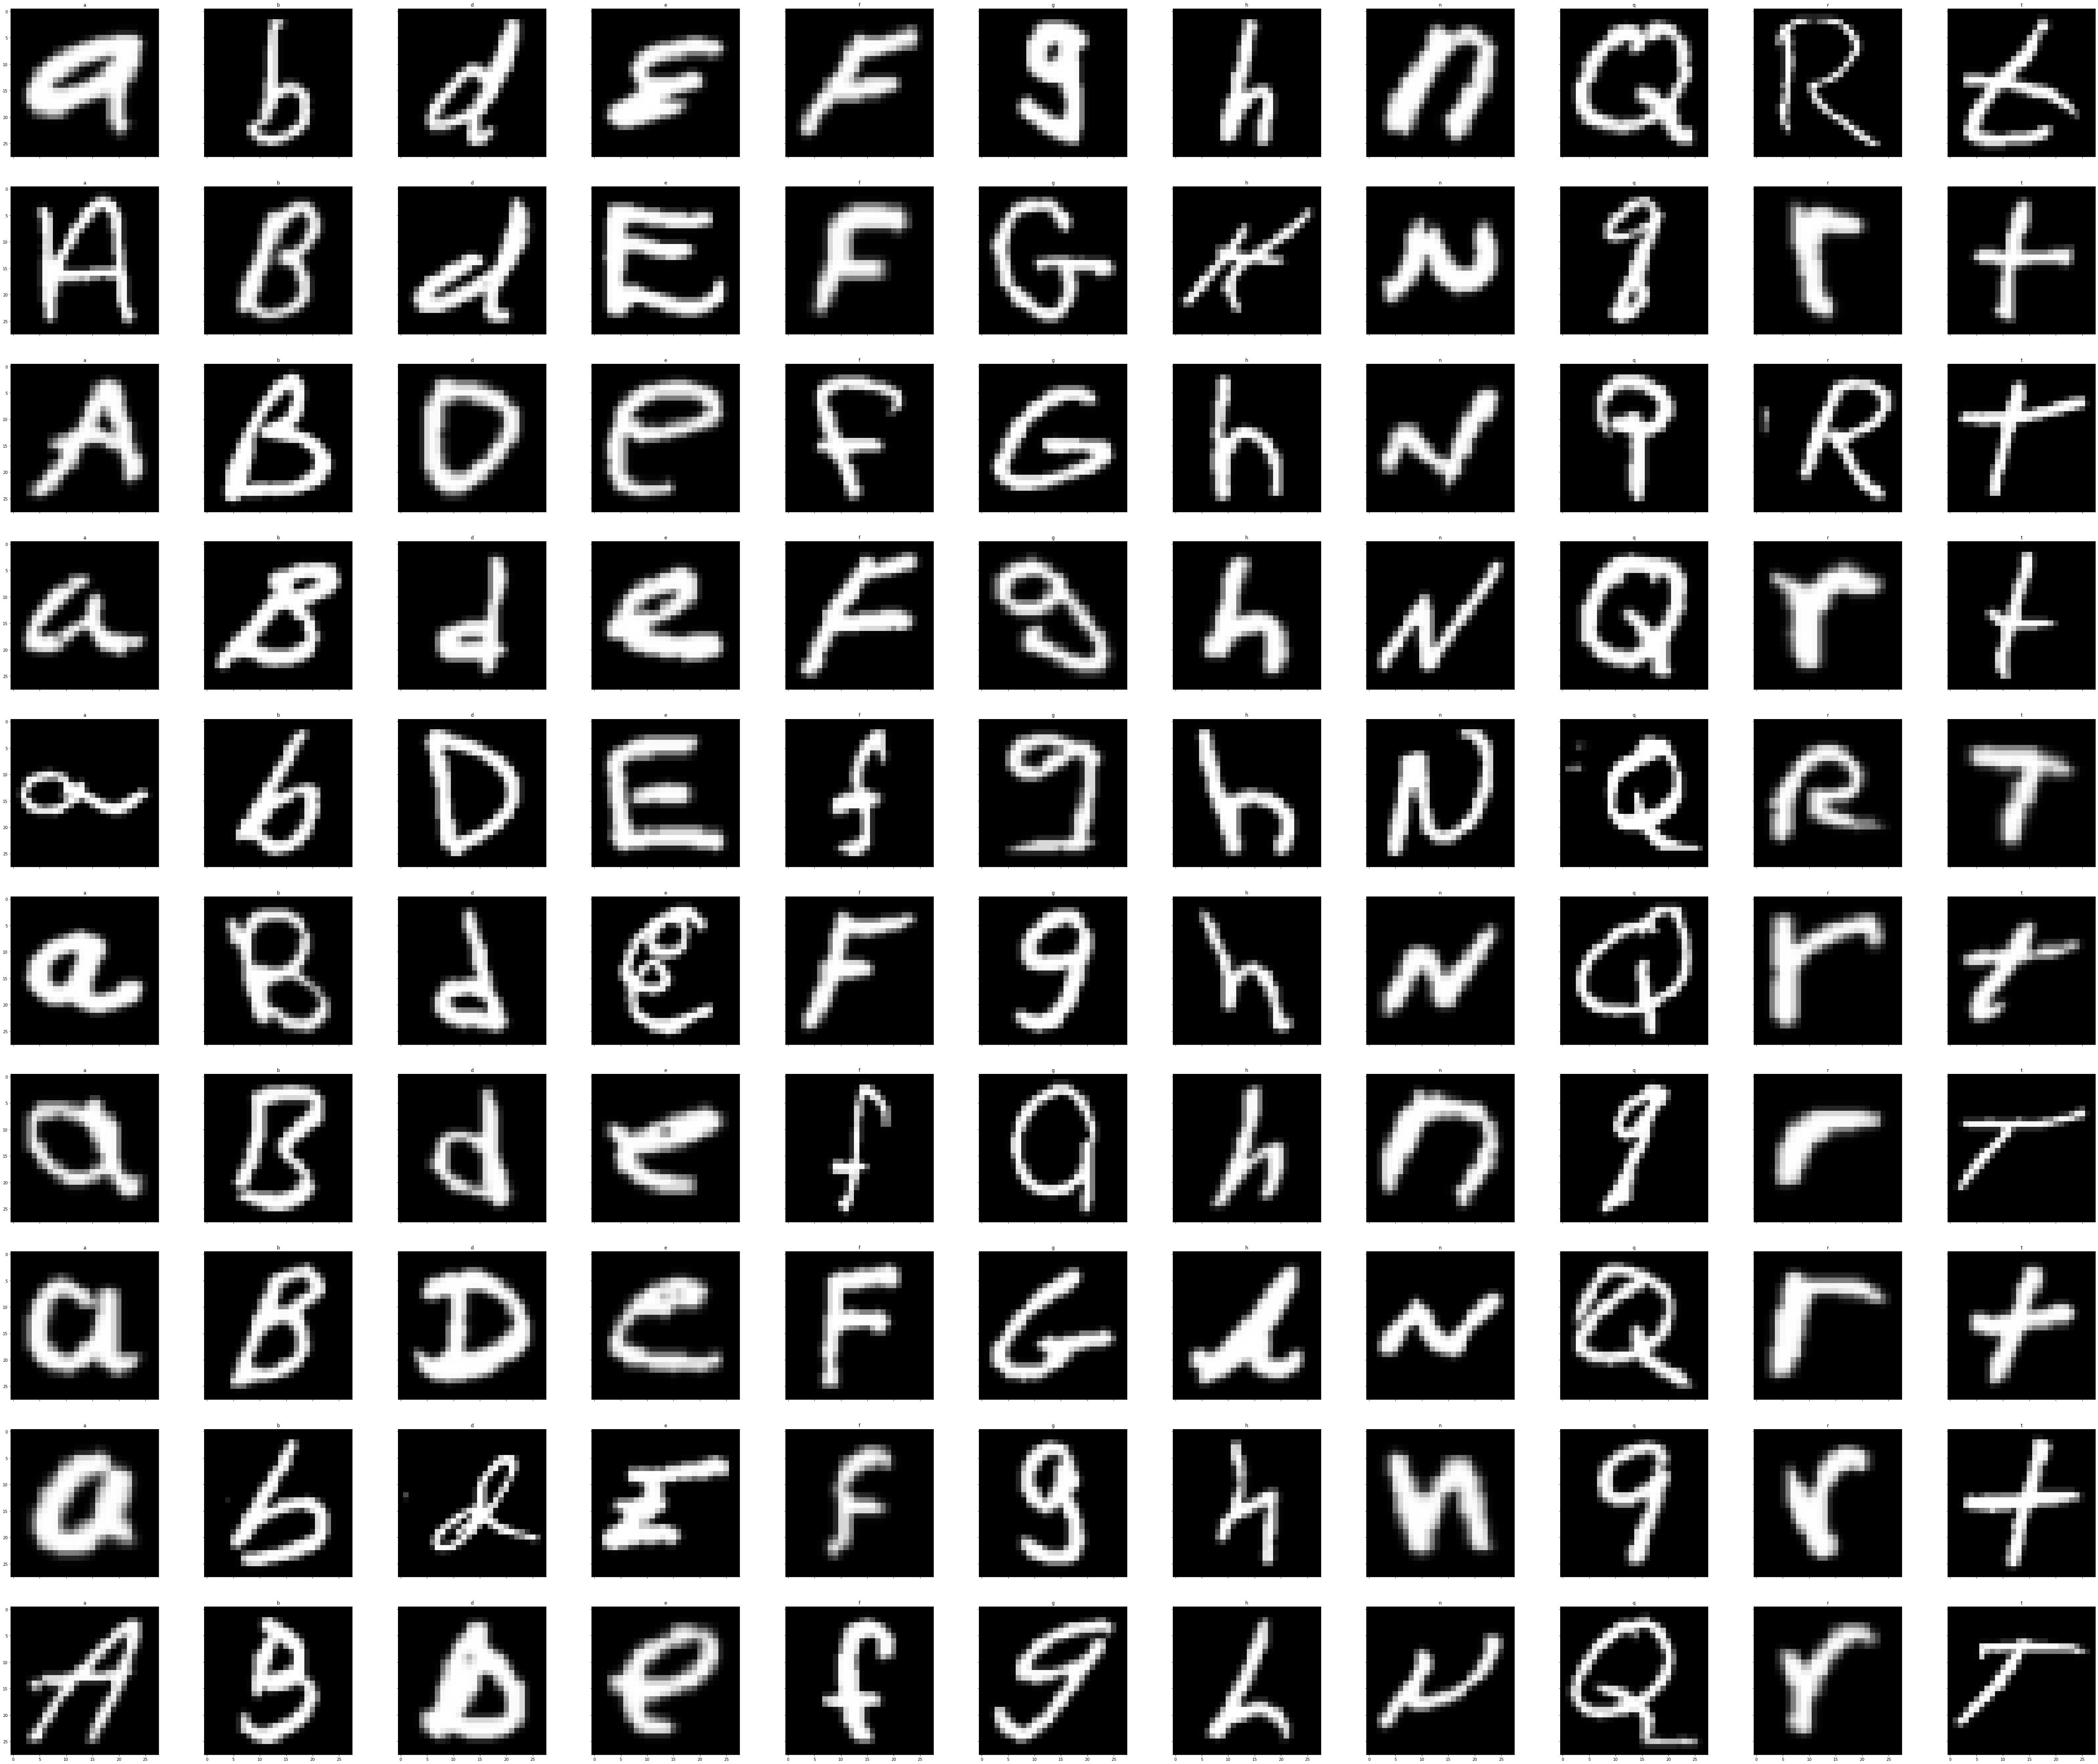

In [82]:
col_size, row_size = 8, 8
fig, axs = plt.subplots(rows_per_item, output_layers, figsize=(col_size * (output_layers + 1), (row_size * (rows_per_item + 0.25))))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[plot_items_1d[i]].reshape(28, 28), cmap='gray')
    ax.set_title(chr(mapp.iloc[y_train[plot_items_1d[i]]][2]))

for ax in axs.flat:
    ax.label_outer()